In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

train_df.head(5)

id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0       25.0      0.50     0.25     0.75   0.50              69.7   
1   1       25.0      0.50     0.25     0.50   0.50              69.7   
2   2       12.5      0.25     0.25     0.63   0.63              86.0   
3   3       12.5      0.25     0.25     0.63   0.50              77.4   
4   4       25.0      0.50     0.25     0.63   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  41.2         24.0                0.39  0.425011   0.417545   
1                  41.2         24.0                0.39  0.444908   0.422051   
2                  50.8         24.0                0.39  0.552927   0.470853   
3                  45.8         24.0                0.39  0.565976   0.478137   
4                  45.8         24.0                0.39  0.579677   0.494165   

       seeds       yield  
0  32.460887  4476.81146  
1  33.858317  5548.12201  
2  38.341781  6869.77760  
3  39.467561  6880.77590  
4  40.484512  7479.93417

In [3]:
# Quick information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [4]:
train_df.shape, test_df.shape

((15289, 18), (10194, 17))

In [5]:
# Check for any null values
train_df.isna().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

<AxesSubplot: >

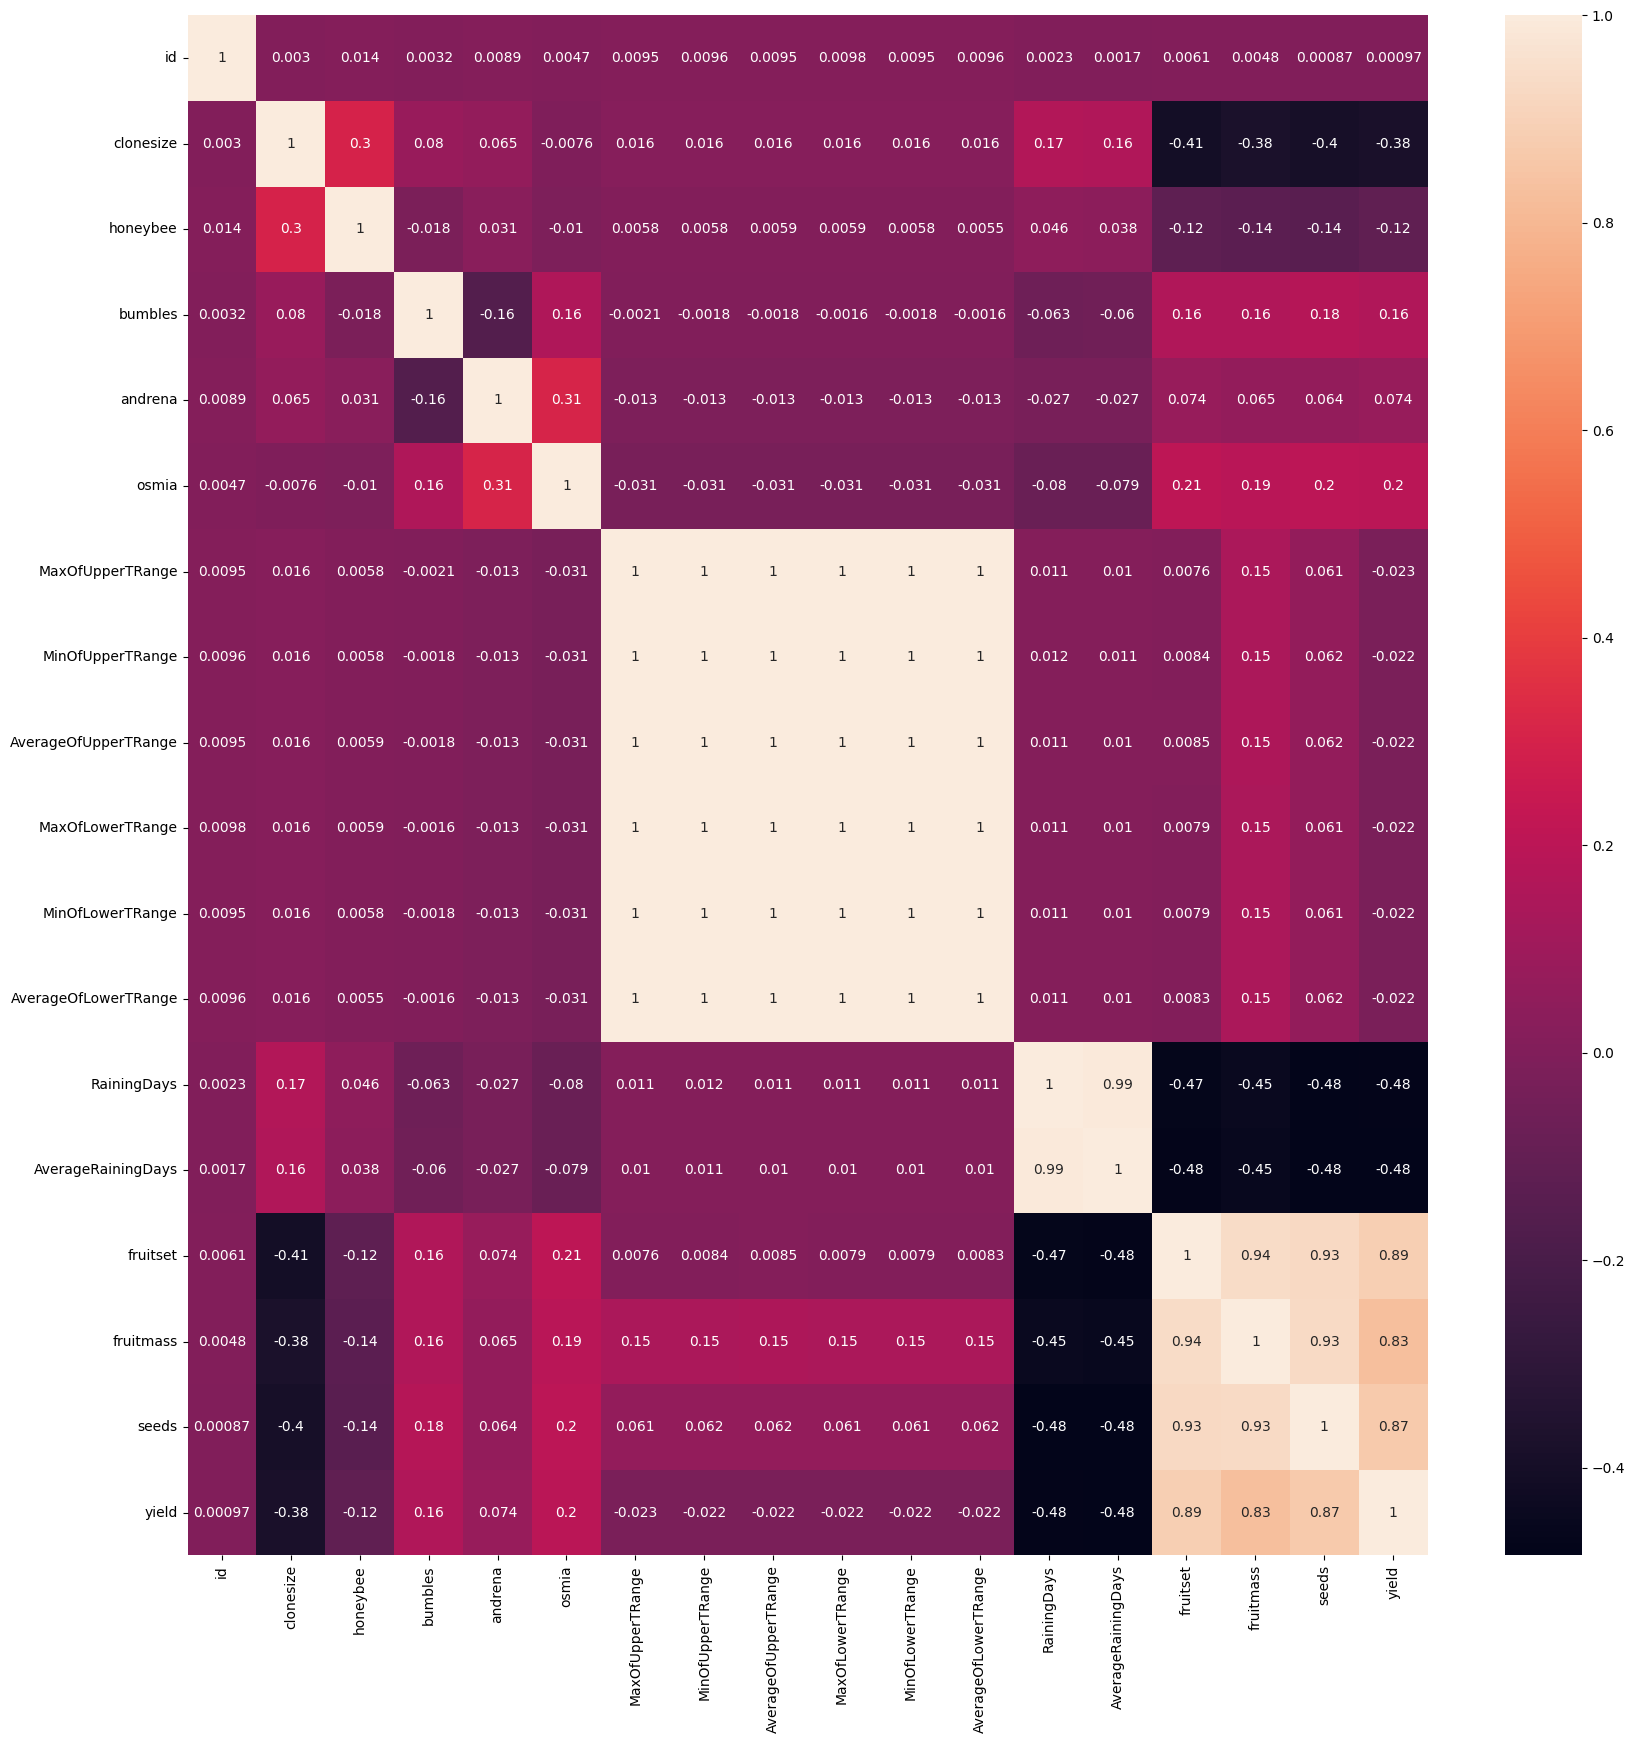

In [6]:
# Correlation heat map
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(train_df.corr(), annot=True, ax=ax)

In [9]:
# Get an understanding of the diffferent values for each variable
train_df.nunique(axis=0)
train_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

id     clonesize      honeybee       bumbles       andrena  \
count  15289.000000  15289.000000  15289.000000  15289.000000  15289.000000   
mean    7644.000000     19.704690      0.389314      0.286768      0.492675   
std     4413.698468      6.595211      0.361643      0.059917      0.148115   
min        0.000000     10.000000      0.000000      0.000000      0.000000   
25%     3822.000000     12.500000      0.250000      0.250000      0.380000   
50%     7644.000000     25.000000      0.500000      0.250000      0.500000   
75%    11466.000000     25.000000      0.500000      0.380000      0.630000   
max    15288.000000     40.000000     18.430000      0.585000      0.750000   

              osmia MaxOfUpperTRange MinOfUpperTRange AverageOfUpperTRange  \
count  15289.000000     15289.000000     15289.000000         15289.000000   
mean       0.592355        82.169887        49.673281            68.656256   
std        0.139489         9.146703         5.546405             7.641807   
min        0.000000        69.700000        39.000000            58.200000   
25%        0.500000        77.400000        46.800000            64.700000   
50%        0.630000        86.000000        52.000000            71.900000   
75%        0.750000        86.000000        52.000000            71.900000   
max        0.750000        94.600000        57.200000            79.000000   

      MaxOfLowerTRange MinOfLowerTRange AverageOfLowerTRange   RainingDays  \
count     15289.000000     15289.000000         15289.000000  15289.000000   
mean         59.229538        28.660553            48.568500     18.660865   
std           6.610640         3.195367             5.390545     11.657582   
min          50.200000        24.300000            41.200000      1.000000   
25%          55.800000        27.000000            45.800000     16.000000   
50%          62.000000        30.000000            50.800000     16.000000   
75%          62.000000        30.000000            50.800000     24.000000   
max          68.200000        33.000000            55.900000     34.000000   

      AverageRainingDays      fruitset     fruitmass         seeds  \
count       15289.000000  15289.000000  15289.000000  15289.000000   
mean            0.324176      0.502741      0.446553     36.164950   
std             0.163905      0.074390      0.037035      4.031087   
min             0.060000      0.192732      0.311921     22.079199   
25%             0.260000      0.458246      0.419216     33.232449   
50%             0.260000      0.506600      0.446570     36.040675   
75%             0.390000      0.560445      0.474134     39.158238   
max             0.560000      0.652144      0.535660     46.585105   

              yield  
count  15289.000000  
mean    6025.193999  
std     1337.056850  
min     1945.530610  
25%     5128.163510  
50%     6117.475900  
75%     7019.694380  
max     8969.401840

In [20]:
len(train_df.columns)

18

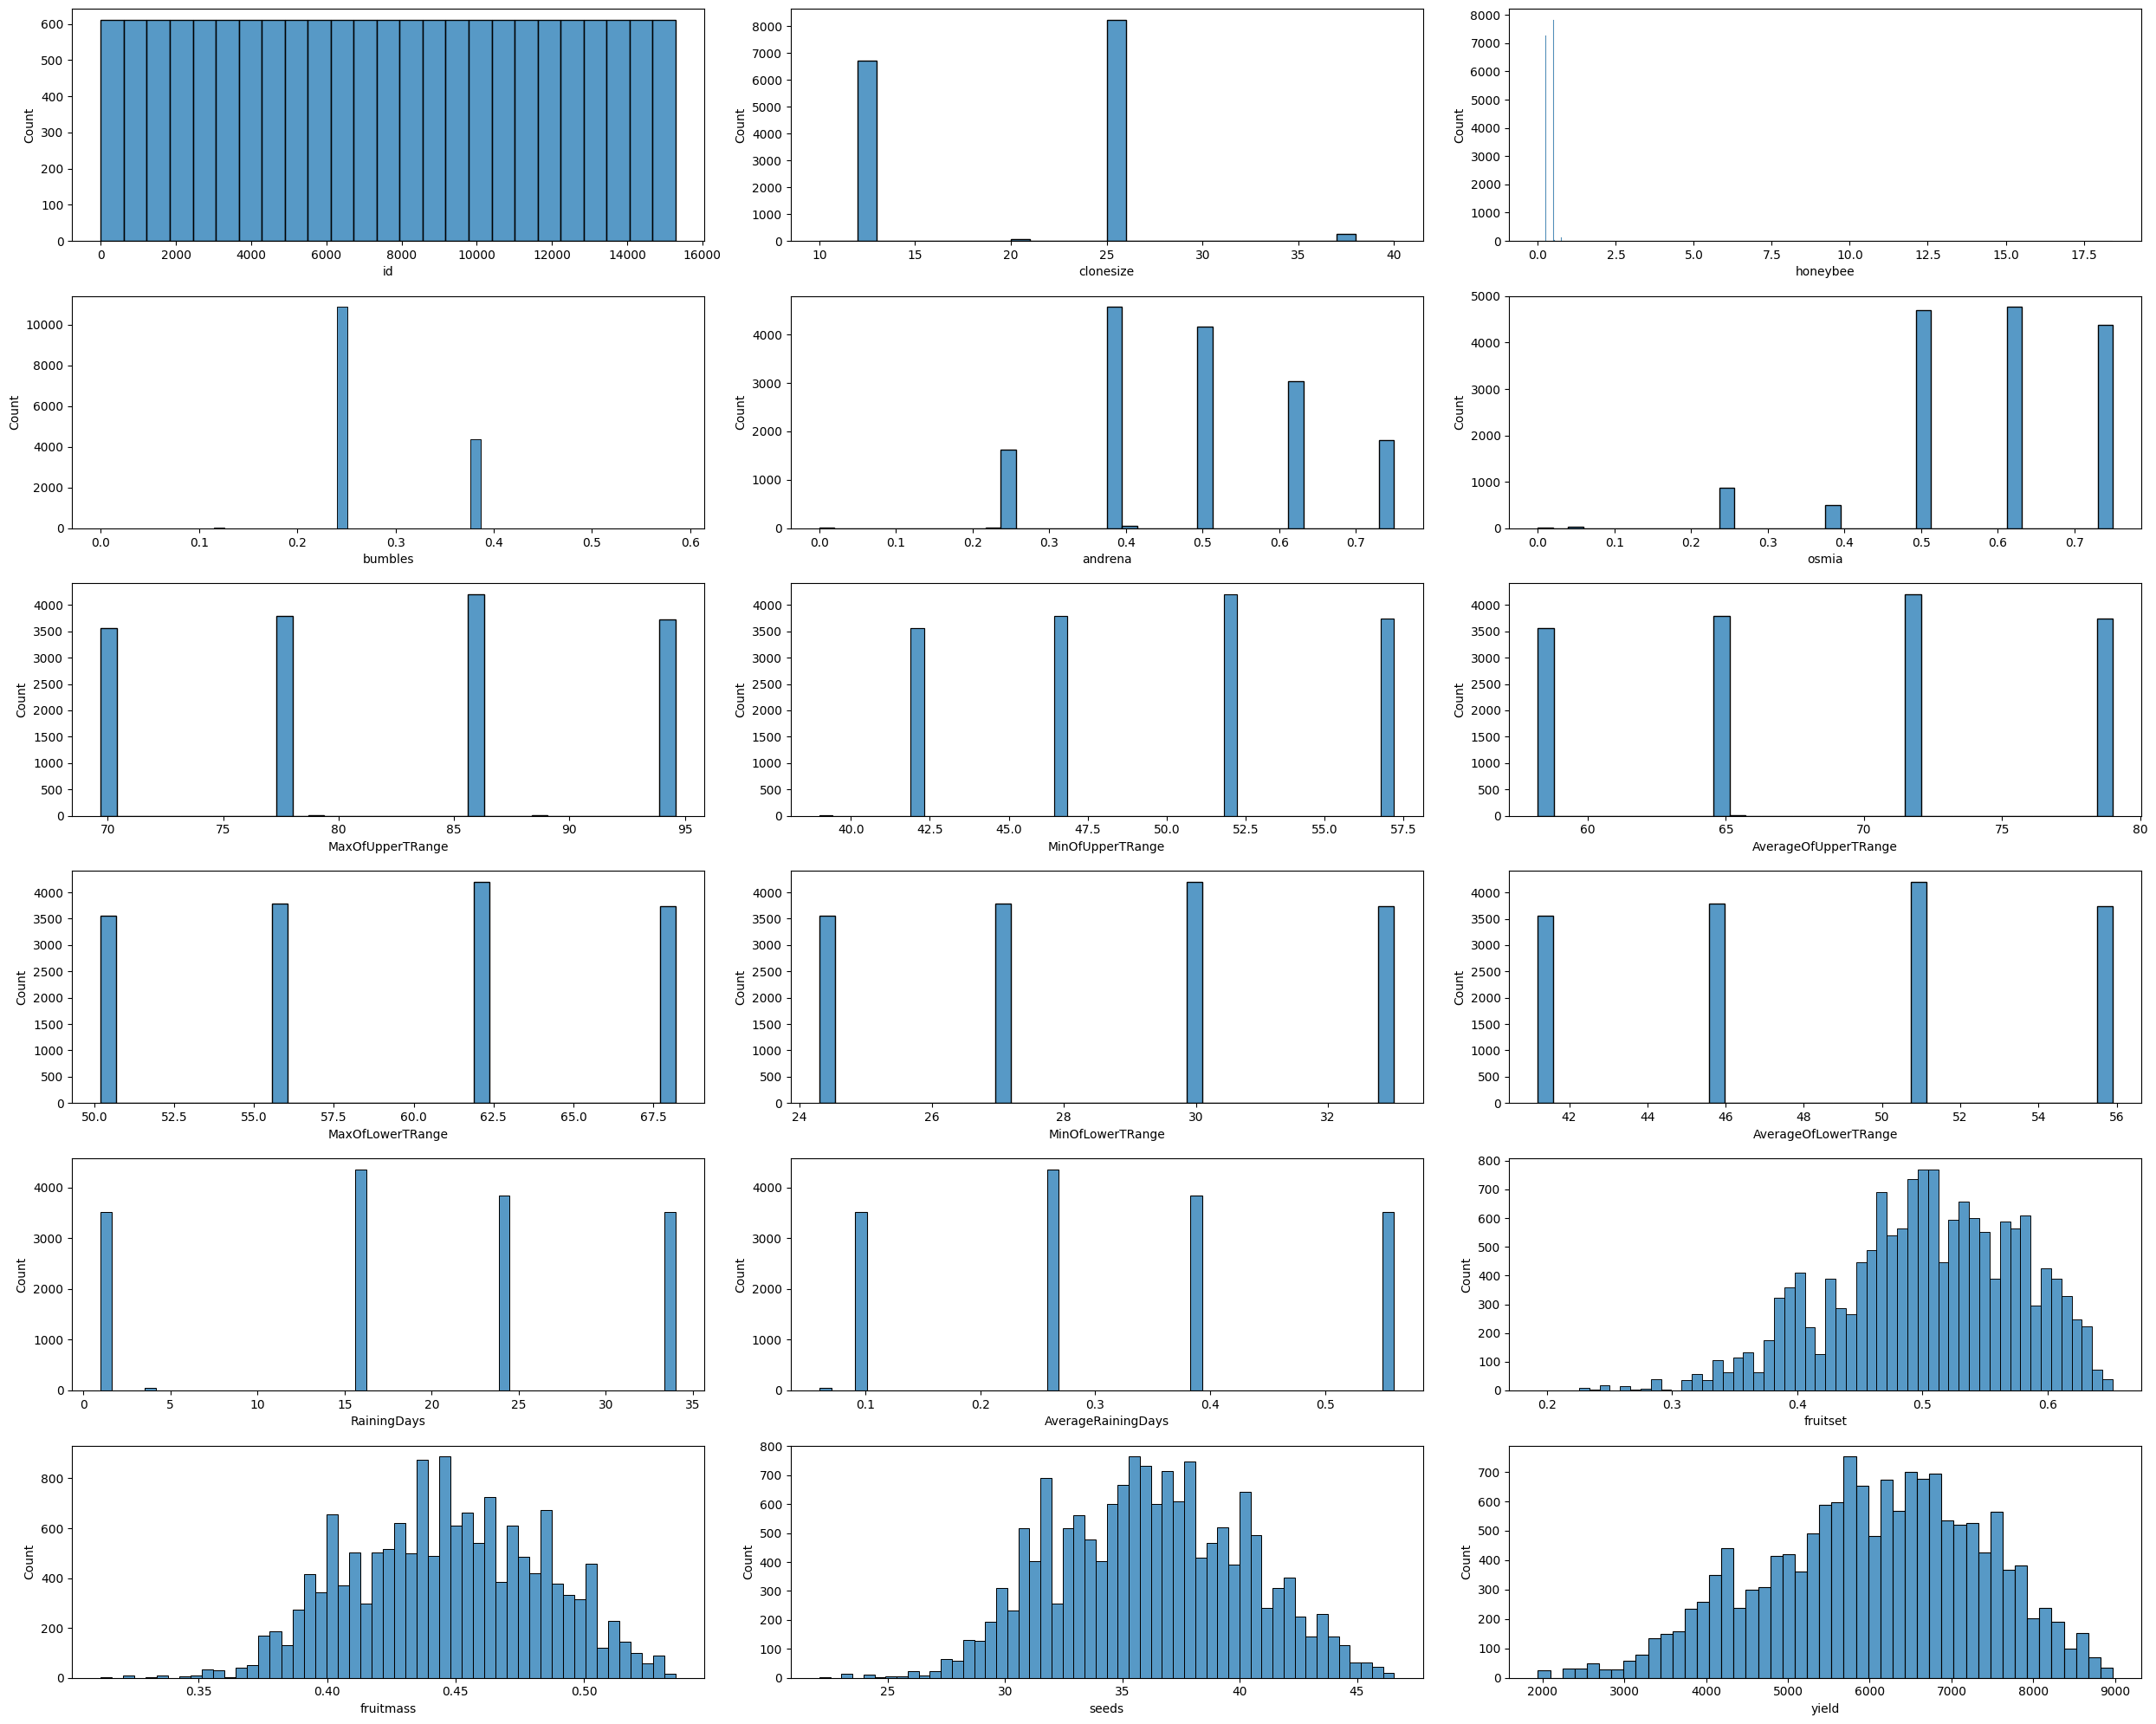

In [25]:
# Look at the yield distribution
fig, axs = plt.subplots(6,3,figsize=(25,20))
for i, col in enumerate(train_df.columns):
    sns.histplot(data=train_df[col], ax=axs[i // 3, i % 3])

plt.tight_layout()
plt.show()


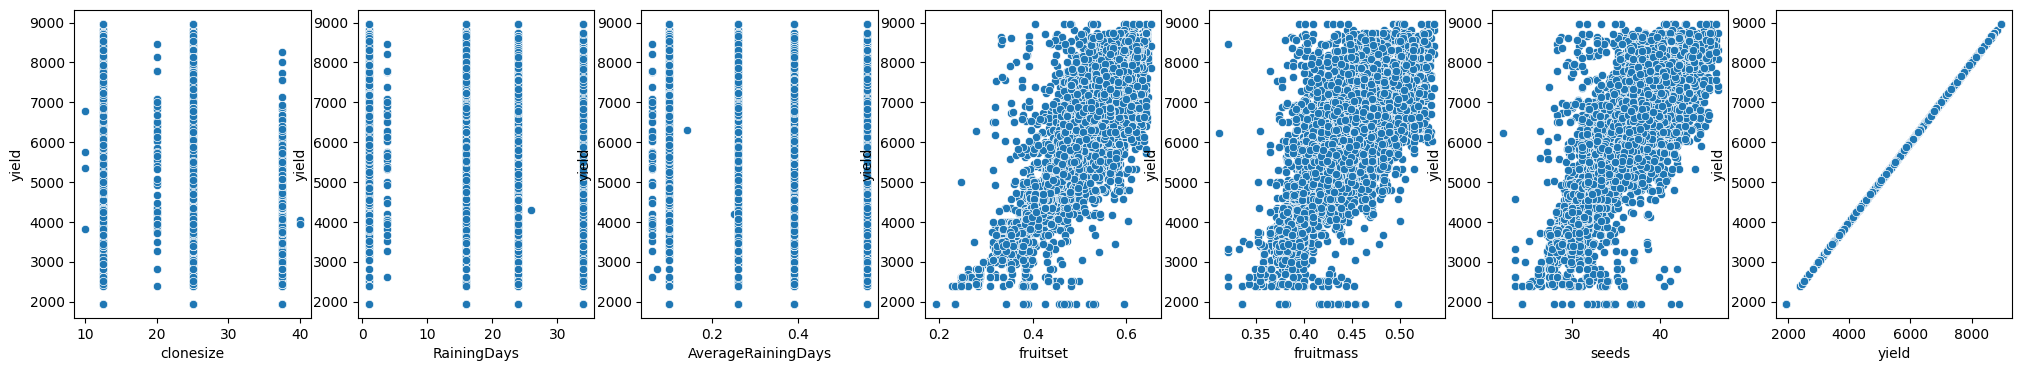

In [15]:
#scatterplots for correlated features
#fig, axs = plt.subplots()

corr = train_df.corr()
cols = corr.iloc[-1,:]
column_list = [cols.index[i] for i in range(len(cols)) if abs(cols[i]) > 0.2]
fig, axs = plt.subplots(1, len(column_list), figsize=(25,4))
for i, col in enumerate(column_list):
    sns.scatterplot(data=train_df, x=col, y='yield', ax=axs[i])



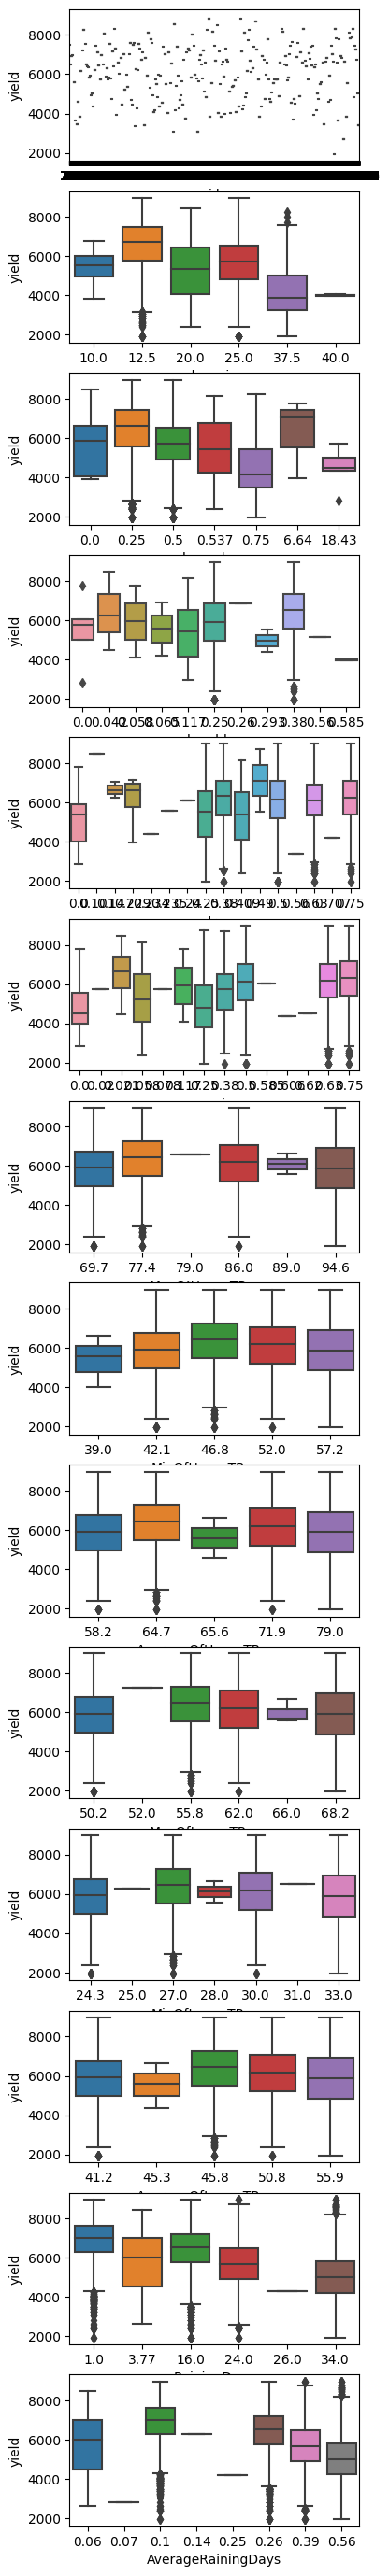

In [29]:
# Investigate clonesize, RainingDays, and AverageRainingDays with boxplots to see if there is any relationship between mean and yield
fig, axs = plt.subplots(len(train_df.columns[:-4]), 1, figsize=(4,35))
for i, col in enumerate(train_df.columns[:-4]):
    sns.boxplot(data=train_df, x=col, y='yield', ax=axs[i])

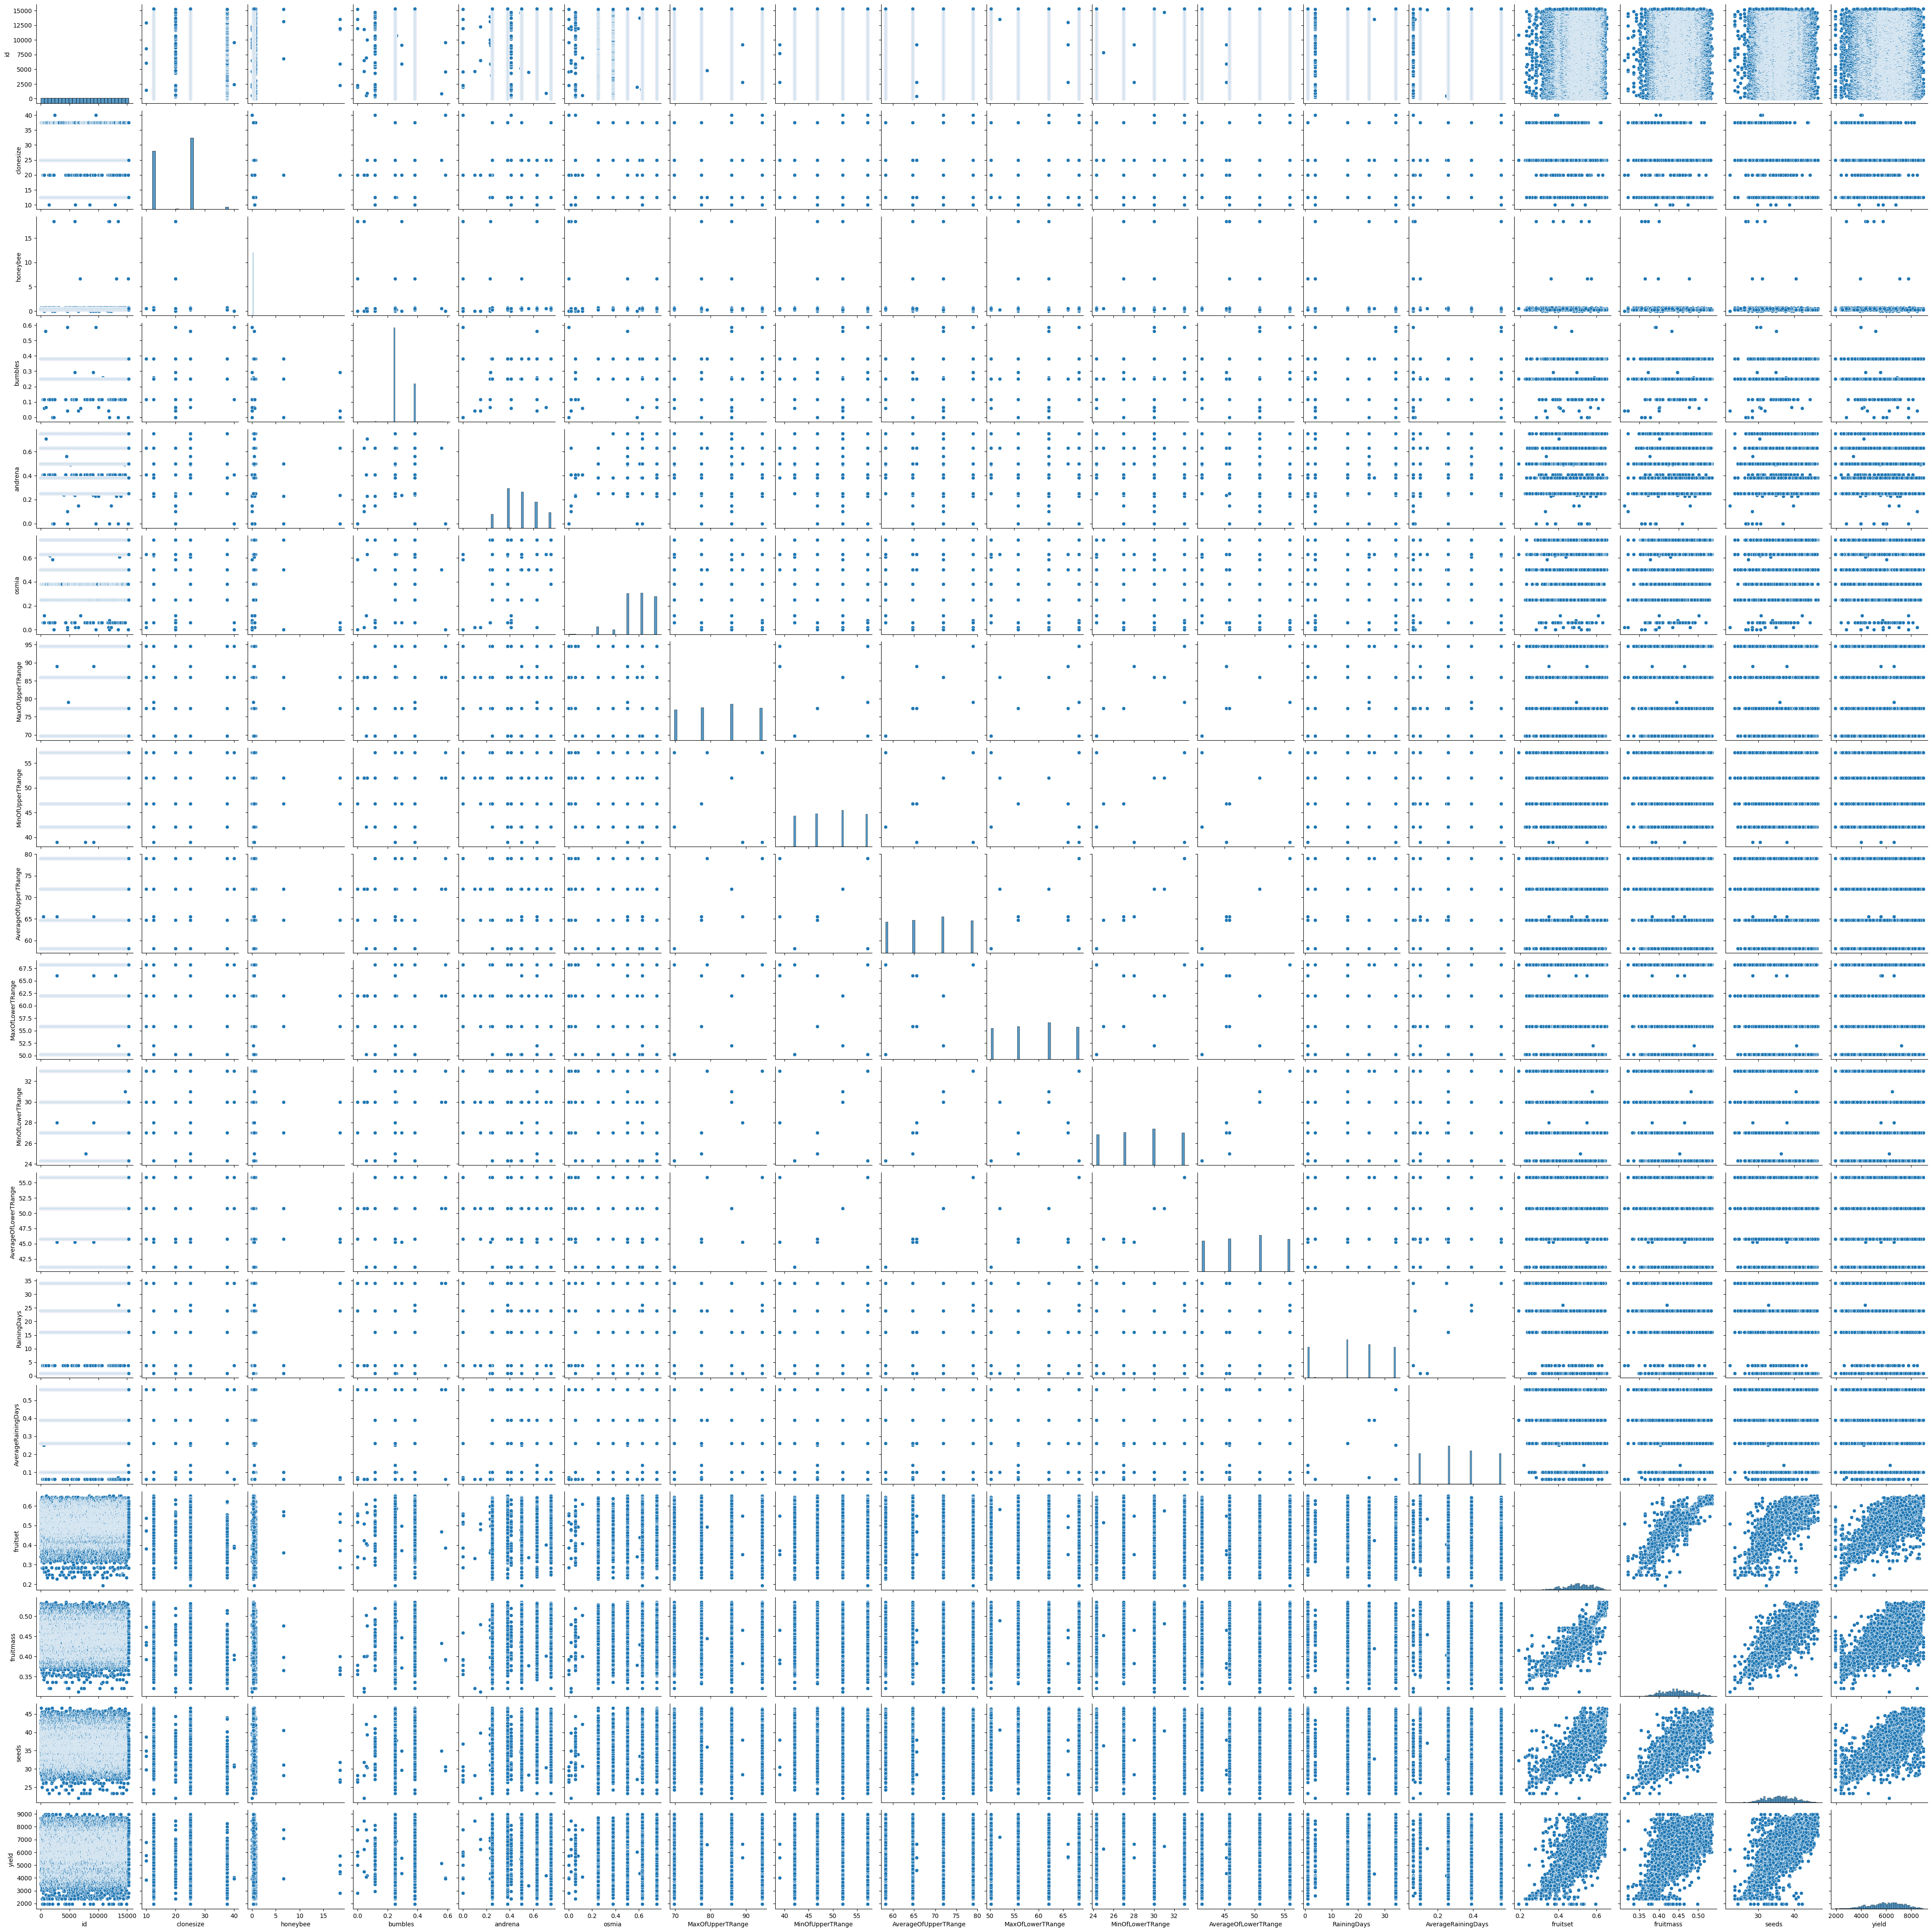

In [38]:
sns.pairplot(train_df)

## Ideas for mlflow
- Iterate through the number of features to select

In [55]:
from sklearn.feature_selection import SelectKBest, f_regression

X_train, y_train = train_df.iloc[:,:-1], train_df['yield']
X_test = test_df

X_train.shape, y_train.shape, train_df.shape

selector = SelectKBest(f_regression, k=6)
X_train_optimal = selector.fit_transform(X_train, y_train)
X_test_optimal = selector.transform(X_test)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected columns
selected_columns = X_train.columns[selected_indices]

X_train_optimal = pd.DataFrame(X_train_optimal, columns=selected_columns)
X_test_optimal = pd.DataFrame(X_test_optimal, columns=selected_columns)


In [64]:
# Categorical encoding
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


categorical_columns = [col for col in X_train_optimal.columns if X_train_optimal[col].value_counts().count() < 10]
numerical_columns = [col for col in X_train_optimal.columns if X_train_optimal[col].value_counts().count() >= 10]

transformer = ColumnTransformer([
    ('numeric', StandardScaler(), numerical_columns),
    ('categorical', OneHotEncoder(), categorical_columns)
])

# Apply the transformations
X_train_t = transformer.fit_transform(X_train_optimal)
X_test_t = transformer.transform(X_test_optimal)

ValueError: Found unknown categories [33.0] in column 1 during transform